In [5]:
from scipy.optimize import curve_fit
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 6

In [6]:
x = np.linspace(0,1, num = 40)
y = 3.45 * np.exp(1.334 * x) + np.random.normal(size=40)

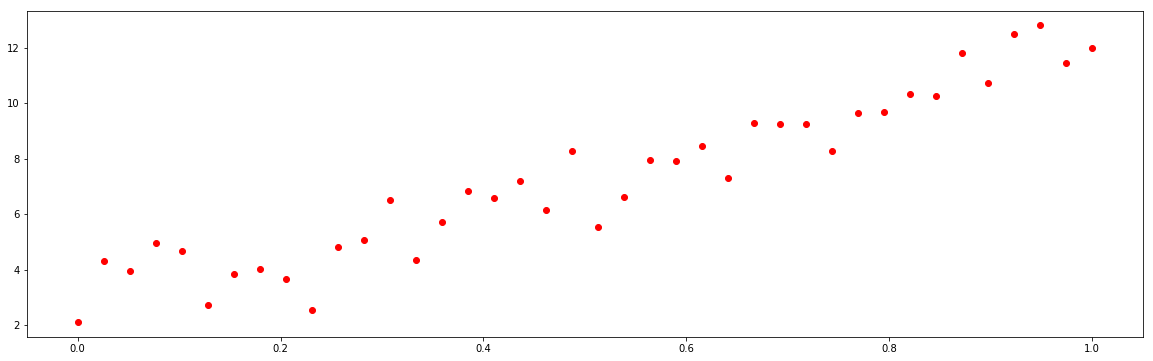

In [7]:
plt.plot(x,y,'ro')

In [8]:
def test(x, a, b):
    return a*np.exp(b*x)

In [9]:
param, param_cov = curve_fit(test, x, y)

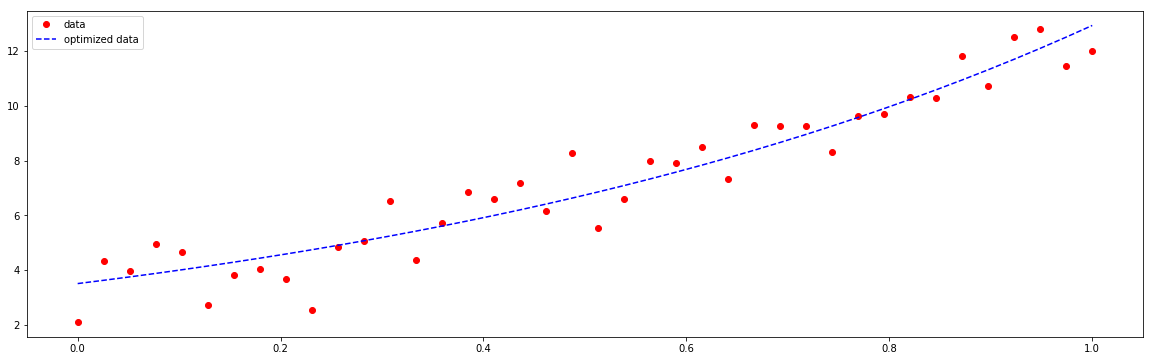

In [10]:
plt.plot(x, y, 'o', color ='red', label ="data") 
plt.plot(x, (param[0]*np.exp(param[1]*x)), '--', color ='blue', label ="optimized data") 
plt.legend() 
plt.show() 

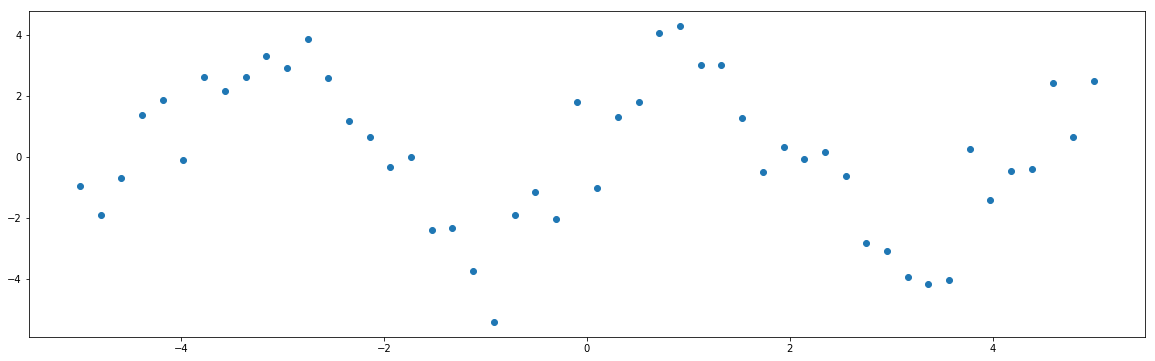

In [13]:
# Seed the random number generator for reproducibility
np.random.seed(0)

x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

# And plot it

plt.scatter(x_data, y_data)

In [15]:
def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = curve_fit(test_func, x_data, y_data,
                                               p0=[2, 2])

print(params)

[3.05931973 1.45754553]


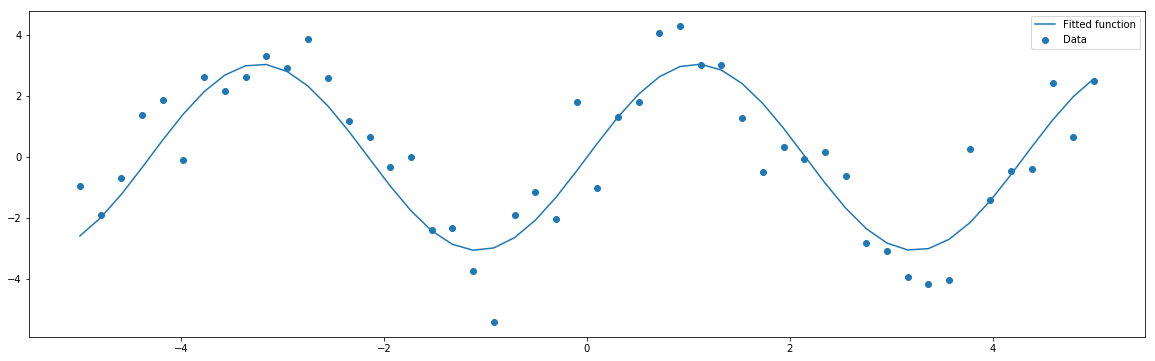

In [16]:
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function')

plt.legend(loc='best')

plt.show()

In [24]:
from sklearn.metrics import r2_score
print('R^2: ', r2_score(y_data, test_func(x_data, params[0], params[1]))*100)

R^2:  78.5229144307653


In [25]:
fibonacci = [0,1,1,2,3,5,8,13,21]
for i in range(len(fibonacci)):
    print(i,fibonacci[i])

0 0
1 1
2 1
3 2
4 3
5 5
6 8
7 13
8 21


In [28]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


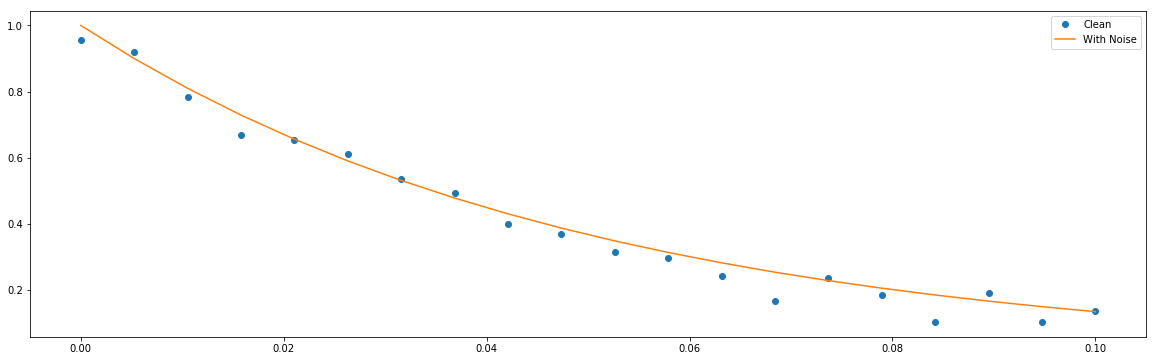

In [29]:
#https://gist.github.com/JCardenasRdz/cd2b0e8cc71913b6e15abcf40ea96b53

# Objective
# Use non-linear curve fitting to estimate the relaxation rate of an exponential
# decaying signal.

# Steps
# 1. Simulate data (instead of collecting data)
# 2. Define the objective function for the least squares algorithm
# 3. Perform curve fitting
# 4. Compare results

# modules
import numpy as np
import matplotlib.pyplot as plt
from   scipy import optimize
# 1. Simulate some data
# In the real worls we would collect some data, but we can use simulated data
# to make sure that our fitting routine works and recovers the parameters used
# to simulate the data
def exp_decay(parameters,xdata):
    '''
    Calculate an exponetial decay of the form:
    S= a * exp(-xdata/b)
    '''
    a = parameters[0]
    b = parameters[1]
    return a * np.exp(-xdata/b)

xdata = np.linspace(0,.1,20)
A = 1.0
B = .050
parameters_used = [A,B]
y_data = exp_decay(parameters_used,xdata)

# Add Gaussian noise with mean = 0, and std. dev = 0.05
y_data_with_noise = y_data + np.random.normal(0,.05,(len(y_data)))

# Plot the simulated data
plt.plot(xdata,y_data_with_noise,'o',xdata,y_data,'-')
plt.legend(('Clean','With Noise'))

In [30]:
# 2. Define the objective function for the least squares algorithm
# The scipy.optimize.least_square requires the following inputs

# A) Objective function that computes the residuals of the
#     predicted data vs the observed data using the following syntaxis:
#     f = fun(parameters, *args, **kwargs),

def residuals(parameters,x_data,y_observed,func):
    '''
    Compute residuals of y_predicted - y_observed
    where:
    y_predicted = func(parameters,x_data)
    '''
    return func(parameters,x_data) - y_observed


Predicted: [0.99161275 0.04733345]
Expected : [1.0, 0.05]


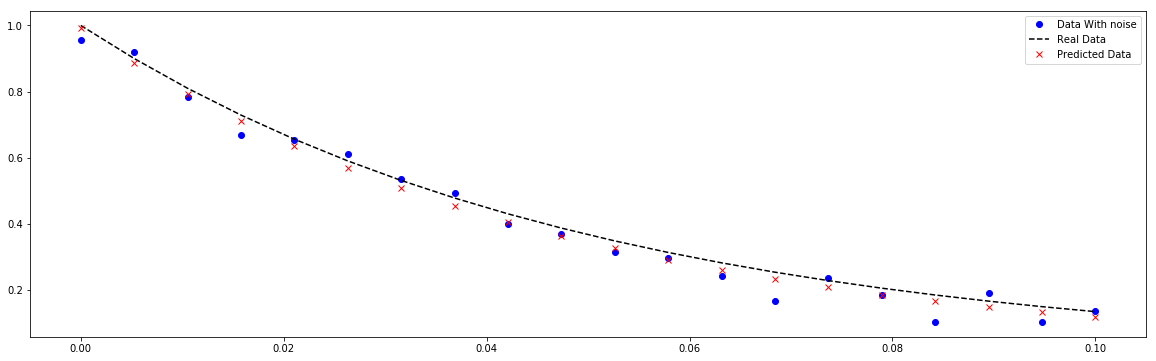

In [31]:
# 3. Perform curve fitting
#    Initial guess for the parameters to be estimated
#    The parameters follow the same order than exp_decay
x0 = [1, 1]

#    Lower and uppers bounds
lb = [0,0]
ub = [2,2]

# estimate parameters in exp_decay
OptimizeResult  = optimize.least_squares(residuals,  x0, bounds = (0,2),
                                          args   = ( xdata, y_data_with_noise,exp_decay) )
parameters_estimated = OptimizeResult.x

# Estimate data based on the solution found
y_data_predicted = exp_decay(parameters_estimated,xdata)

# Plot all together
plt.figure(2)
plt.plot(xdata,y_data_with_noise,'ob',
         xdata,y_data           ,'--k',
         xdata,y_data_predicted ,'xr')
plt.legend(('Data With noise','Real Data','Predicted Data'))

# How good are the parameters I estimated?
print( 'Predicted: ' + str( parameters_estimated))
print( 'Expected : ' + str( parameters_used))

In [5]:
# temperature list
temperature = []

  # use while loop to fill temperature list with temperature degrees
degree_value = 20
degree_max = 100
while degree_value <= degree_max:
    temperature.append(degree_value)
    degree_value += 5

  #Updated Temperature List
print('Updated temperature list: ', temperature)

Updated temperature list:  [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
